## EECS 491 Assignment 1

Due Mon Feb 22 before midnight. 140 points total.

### Submitting assignments to Canvas

- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If your are not using notebooks, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS491-A1-yourcaseid.ipynb`
  - `EECS491-A1-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS491-A1-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS491-A1-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

Some of questions below aren't specified in great detail and you may need to spend sometime making sense of the questions themselves, which you can do from the reads and other sources.  You also might need to fill in some blanks or make some assumptions.  The spirit behind this approach is explained in [The Problem with Problems](http://web.mit.edu/6.969/www/readings/mazur.pdf) by Eric Mazur, which I encourage everyone to read.

## Put your name and Case ID here
### ziang meng 
### 3621316

### Q1. Basic probability (10 pts)

In the proofs below you should use general probability distributions (as opposed to specific examples) and the basic laws of probability.  Be concise and clear.  The proof should be in terms of mathematical facts of probability theory.

1.1. Prove (5 pts)
$$ p(x,y|z) = p(x|z)p(y|x,z) $$

answer: 
$$p(x,y|z) =\frac{p(x,y,z)}{p(z)}=\frac{p(x,y,z)}{p(z)}*\frac{p(x,z)}{p(x,z)}=\frac{p(x,y,z)}{p(x,z)}*\frac{p(x,z)}{p(z)}=p(x|z)p(y|x,z)$$

1.2. Prove (5 pts)
$$ p(x|y,z) = \frac{p(y|x,z)p(x|z)}{p(y|z)} $$

answer:$$p(x,y|z) =\frac{p(x,y,z)}{p(z)}=\frac{\frac{p\left( x,y,z \right)}{p\left( z \right)}*\frac{p\left( x,z \right)}{p\left( x,z \right)}}{\frac{p\left( y,z \right)}{p\left( z \right)}}= \frac{p(y|x,z)p(x|z)}{p(y|z)}$$

### Q2. Independence (10 pts)

Again these proofs should use general probability distributions and the basic laws of probability.  Note that the proof should be in terms of mathematical facts.  It should not be an argument that depends on real-world knowledge.  The example should use common real-world knowledge and interpretation should convey the ideas of the proof.

2.1 Prove that independence is not transitive, i.e. 
$a \perp b \wedge b \perp c \nRightarrow a \perp c$. Define a joint probability distribution $p(a,b,c)$ for which the previous expression holds and provide an example with an interpretation. (5 pts)

- answer:
Let A, B, and C be three events such that A and B are independent, B and C are independent,which means $p(A|B) = p(A)$ and $p(C|B) = p(C)$

But $p(A|C) = \frac{p(A,C)}{p(C)}$. Even if A and B are independent, and B and C are independent, it is possible for $p(A,C)$ to be different from $p(A)p(C)$. This means that A and C are not independent, as their joint probability is affected by the occurrence of event B.

For example, let A = Tossing a silver coin is heads,C = Tossing a silver coin is tails,B = yesterday the weather was sunny.A and B are independent, and B and C are independent,But A and C are not independent.







2.2 Prove that conditional independence does not imply marginal independence, i.e. $a \perp b | c \nRightarrow a \perp b$. Again provide an example that illustrates the statement. (5 pts)

- answer:
assume $a \perp b | c $,try to prove  $a \perp b $
$$p\left( a,b|c \right) =p\left( a \right) \frac{p\left( b,c \right)}{p\left( c \right)}
$$
then if  $b \perp c $,we konw that $$p\left( a,b|c \right) = p(a,b))$$ and $$ p\left( a \right) \frac{p\left( b,c \right)}{p\left( c \right)}=p(a)p(b)$$
which means p(a,b)=p(a)p(b),$a \perp b $.
but not all $b \perp c $,which is an assumption.therefore,p(a,b)=p(a)p(b) can not guaranteed only if $b \perp c $.

### Q3. Inspector Clouseau re-revisited (20 pts)

3.1 Write a program to evaluate $p(B|K)$ in Example 1.3 in Barber. Write your code and choose your data representations so that it is easy to use it to solve the remaining questions. Show that it correctly computes the value in the example. (5 pts)

3.2 Define a different distribution for $p(K|M,B)$.  Your new distribution should result in the outcome that $p(B|K)$ is either $<0.1$ or $>0.9$, i.e. reasonably strong evidence.  Use the original values of $p(B)$ and $p(M)$ from the example.  Provide (invent) a reasonble justification for the value of each entry in $p(K|M,B)$. (5 pts)

3.3 Derive the equation for $p(M|K)$. (5 pts)

3.4 Calculate it's value for both the original $p(K|M,B)$ and the one you defined yourself. Is it possible to provide a summary of the main factors that contributed to the value?  Why/Why not?  Explain. (5 pts)

### 3.1

In [56]:
murderer = 0.6
murder = 0.2
not_murderer_not_murder = 0.3
murderer_not_murder = 0.6
not_murderer_murder = 0.2
murderer_murder = 0.1
def Bayes(murderer,murder,not_murderer_not_murder,not_murderer_murder,murderer_not_murder,murderer_murder):
    A = murderer * (murderer_murder* murder + murderer_not_murder * (1-murder))
    B = (not_murderer_murder * murder + not_murderer_not_murder * (1-murder))*(1-murderer)
    return A/(B+A)
print(Bayes(murderer,murder,not_murderer_not_murder,not_murderer_murder,murderer_not_murder,murderer_murder))


0.7281553398058251


### 3.2
If want to get  $p(B|K) > 0.9$ ,we need make possiblility of butler not murderer low,so make not_murderer_not_murder and not_murderer_murder lower.

In [57]:
not_murderer_not_murder = 0.01
not_murderer_murder = 0.01
print(Bayes(murderer,murder,not_murderer_not_murder,not_murderer_murder,murderer_not_murder,murderer_murder))

0.9868421052631579


### 3.3
$$p(\ M\mid K)$$
$$=\sum_{b}p(b,M\mid K)$$
$$=\sum_{b}\frac{p(b,M,K)}{p(K)}$$
$$=\frac{\sum_{b}p(K\mid b,M)p(b,M)}{\sum_{b.m}p(K\mid b,m)p(b,m)}$$
$$=\frac{p(M)\sum_{b}p(K\mid b,M)p(b)}{\sum_{m}p(m)\sum_{b}p(K\mid b,m)p(b)}$$

### 3.4

In [58]:
# original  𝑝(𝐾|𝑀,𝐵)
not_murderer_not_murder = 0.3
not_murderer_murder = 0.2
def Bayes_mb(murderer, murder, not_murderer_not_murder, not_murderer_murder, murderer_not_murder, murderer_murder):
    A = murder * ((murderer_murder) * (murderer) + (not_murderer_murder) * (1-murderer))
    B = (1-murder) * ((murderer_not_murder) * (murderer) + (not_murderer_not_murder) * (1-murderer))
    return A/(A+B)
print(Bayes_mb(murderer,murder,not_murderer_not_murder,not_murderer_murder,murderer_not_murder,murderer_murder))

0.06796116504854369


In [59]:
# defined myself
not_murderer_not_murder = 0.01
not_murderer_murder = 0.01
print(Bayes_mb(murderer,murder,not_murderer_not_murder,not_murderer_murder,murderer_not_murder,murderer_murder))

0.04210526315789474


To reduce p(M |K), the most direct way is to reduce p(K | B = F, M = T). So p(K | B = F, M = T) is the main contributing factor.

### Q4. Biased views (20 pts)

4.1 Write a program that calculates the posterior distribution of the $\theta$ (probability of heads) from the Binomial distribution given $y$ heads out of $n$ trials.  Feel to use a package where the necessary distributions are defined as primitives. (5 pts)

4.2 Imagine three different views on the coin bias:
- "I believe strongly that the coin is biased to either mostly heads or mostly tails."
- "I believe strongly that the coin is unbiased".
- "I don't know anything about the bias of the coin."

Define and plot prior distributions that expresses each of these beliefs.  Provide a brief explanation. (5 pts)

4.3 Perform Bernoulli trials where one of these views is correct.  Show how the posterior distribution of $\theta$ changes for each view for $n$=0, 1, 2, 5, 10, and 100.  Each view should have its own plot, but with the curves of the posterior after different numbers of trials overlayed. (5 pts)

4.4 Is it possible that each view will always arrive at an accurate estimate of $\theta$?  How might you determine which view is most consistent with the data after $n$ trials? (5 pts)

### Q4 answer:

In [60]:
##q4.1
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt 

def binomial_posterior(Θ,y, n, a, b):
    post_a = a + y
    post_b = b + n - y
    return beta.pdf(n,post_a, post_b)

#### Q4.2
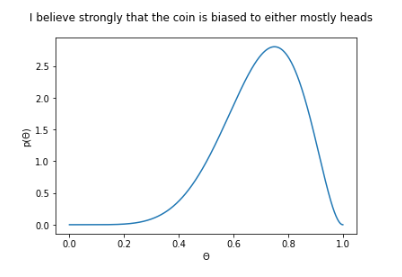

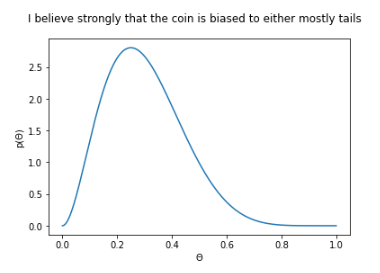

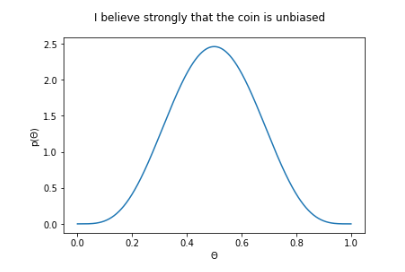

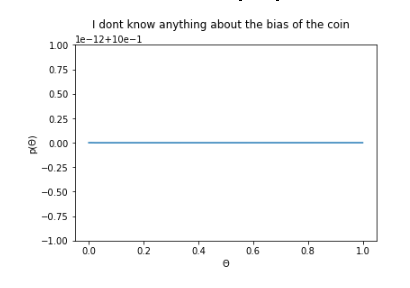

### 4.3

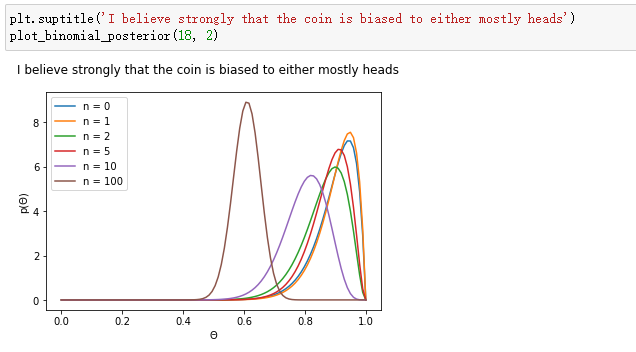

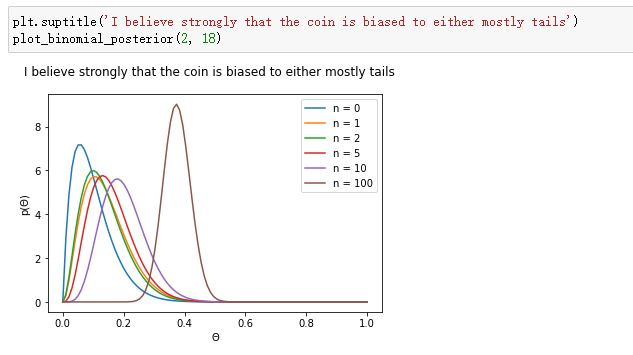

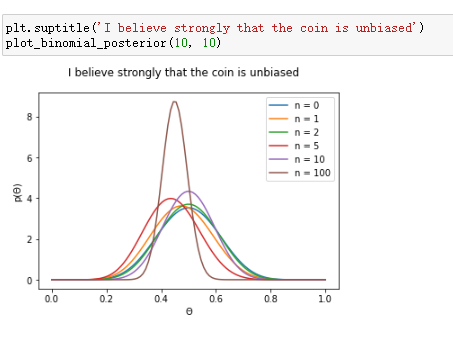

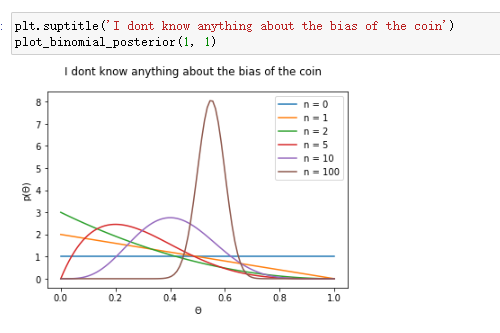

#### 4.4 yes，The larger n is, the more accurate it can be guaranteed. As n grows closer to the accurate estimate of 𝜃.Compare the prior probability and posterior probability maps, the more similar the more consistent. I think unbiased coin is the most consistent.

### Q5. Inference using the Poisson distribution (20 pts)

Suppose you observe for 3 seconds and detect a series of events that occur at the following times (in seconds): 0.53, 0.65, 0.91, 1.19, 1.30, 1.33, 1.90, 2.01, 2.48.

5.1 Model the rate at which the events are produced using a Poisson distribution where $\lambda$ is the number of events $n$ observed per unit time (1 second).  Show the likelihood equation and plot it for three different values of $\lambda$: less, about equal, and greater than what you estimate (intuitively) from the data. (5 pts)

5.2 Derive the posterior distribution of $\lambda$ assuming a Gamma prior (usually defined with parameters $\alpha$ and $\beta$).  The posterior should have the form $p(\lambda | n, T, \alpha, \beta)$ where $T$ is the total duration of the observation period and $n$ is the number of events observed within that period. (5 pts)

5.3 Show that the Gamma distribution is a *conjugate prior* for the Poisson distribution, i.e. it is also a Gamma distribution, but defined by parameters $\alpha'$ and $\beta'$ that are functions of the prior and likelihood parameters. (5 pts)

5.4 Plot the posterior distribution for the data above at times $T$ = 0, 0.5, and 1.5.  Overlay the curves on a single plot.  Comment how it is possible for your beliefs to change even though no new events have been observed. (5 pts)


### 5.1

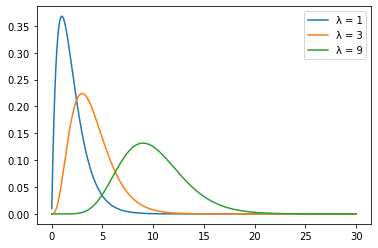

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import poisson
##observe for 3 seconds occur 9 ，so 3 times per second on average
k=3


x = np.linspace(0.01,30,1000)
y1 = [poisson.pmf(1,xi) for xi in x]
plt.plot(x,y1, label='λ = 1')#less than what you estimate
y3 = [poisson.pmf(3,xi) for xi in x]
plt.plot(x,y3, label='λ = 3')#less than what you estimate
y9 = [poisson.pmf(9,xi) for xi in x]
plt.plot(x,y9, label='λ = 9')#less than what you estimate


plt.legend()
plt.show()


### 5.2
$p(\lambda\mid n,T,\alpha,\beta)=\frac{p(n,T\mid\lambda,\alpha,\beta)p(\lambda\mid\alpha,\beta)p(\alpha,\beta)}{p(n,T\mid\alpha,\beta)p(\alpha,\beta)}$
$=\frac{p(n,T\mid\lambda,\alpha,\beta)\Gamma(\lambda;\alpha,\beta)}{p(n,T\mid\alpha,\beta)}$
$\frac{p(n,T\mid\lambda,\alpha,\beta)\Gamma(\lambda;Q,\beta)}{\int_{\mathrm{0}}^{\infty}p(n,T\mid\lambda,\alpha,\beta)p(\lambda\mid\alpha,\beta)\cdot d\lambda}$
$$=\frac{\frac{e^{-\lambda T}(\lambda T)^{n}}{n!}\cdot\Gamma(\lambda;\alpha,\beta)}{\int_{0}^{\infty}(\frac{e^{-\lambda T}(\lambda T)^{n}}{n!}\cdot\Gamma(\lambda;\alpha,\beta))d\lambda}$$
$$=\frac{e^{-\lambda T}(\lambda T)^{n}\cdot\lambda^{\alpha-1}e^{-\beta\lambda}}{\int_{0}^{\infty}e^{-\lambda(\beta+T)}(T\lambda)^{n}\lambda^{\alpha-1}\cdot d\lambda}$$


### 5.3
According to Bayes, the posterior probability can be obtained:$$p(\theta|y)={\frac{p(\theta,y)}{p(y)}}={\frac{p(\theta)p(y|\theta)}{p(y)}}\propto p(\theta)p(y|\theta)$$
and we know :
$$p(y|\theta)=\frac{\theta^{y}e^{-\theta}}{y!},y=0,1,2,\cdot\cdot\cdot$$ which can write:
$$\mathcal{P}(y|\theta)\longrightarrow\Pi_{i=1}^{n}\frac{\theta^{y_{i}}e^{-\theta}}{y_{i}!}\ \propto\ \theta^{\sum_{i=1}^{n}y_{i}}\,e^{-n\theta}$$
let assume $t(y)=\sum_{i=1}^{n}y_{i}\,=\,n{\bar{y}}$,$p(y|\theta)$can be wirte like:$$p(y|\theta)\propto\theta^{t(y)}e^{-n\theta}=\theta^{n\bar{y}}e^{-n\theta}$$
simily,we can write prior like $$p(\theta)\propto\theta^{\alpha}e^{-\beta\theta}$$
so posterior is :$$p(\theta|y)\propto p(\theta)p(y|\theta)\propto\theta^{\alpha-1}e^{-\beta\theta}\cdot\theta^{t(y)}e^{-n\theta}=\theta^{-\alpha+t(y)}e^{(-n+\beta)\theta}$$
which can be wirte like a Gamma distribution:
$$G a m m a(-\alpha+t(y),-n+\beta)=G a m m a(-\alpha+n\bar{y},-n+\beta)$$

### 5.4

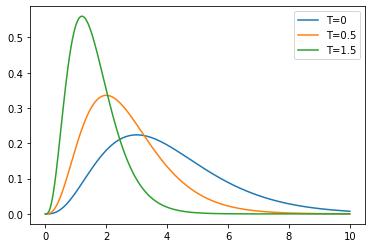

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Poisson observations
n = 3

# Observation time
Ts = [0, 0.5, 1.5]

# Prior parameters
alpha = 1
beta = 1

# Posterior parameters
alpha_post = alpha + n
x = np.linspace(0, 10, 1000)
# Plot the posterior distributions
for T in Ts:
    beta_post = beta + T
    plt.plot(x, gamma.pdf(x, alpha_post, scale=1/beta_post), label='T={}'.format(T))

plt.legend()
plt.show()

Comment :I don't know what to comment, I have no change beliefs. It seems like no new events have been observed.

### Q6. Probability Distribution Example (20 pts)

In this problem you will illustrate a probability distribution in a settings of your choosing.  It can be discrete or continuous.  This is meant to be a simpler version of the letter seqeunce example shown in class (so don't use that).  Your example should use two random variables that each have at least *three* distinct values (if it is discrete), i.e. don't use binary variables.  The variables should not be independent, in other words, the setting you are modeling should have structure, and ideally structure that is interesting and interpretable in some way.  Your example should include the following:

- a decription of the setting
- an illustration of the joint probability and how it captures the structure 
- an illustration of a conditional probability
- an illustration of marginal probability

Note that "illustration" here means to explain with tables or figures that convey the ideas of the mathematical operations.  The motivation behind this exercise is to help you develop a better understanding of how joint probability distributions model probabilistic structure in a simplified setting, so try to choose something you are very familiar with.  If find this is getting too long, you can continue it as part of the exploration, but there you will also need to add and inference problem.

### q6 answer （This was discussed with Yuqiao Xu 3619710, nan ke 3603163, zhaoxuan Jin 3594679, and ziming cui.）
We have two random variables X and Y, where X represents the weather condition (sunny , cloudy, or rainy) and Y represents the type of activity a person might engage in (outdoor sports, indoor activities, or stay at home).we have joint probability being:

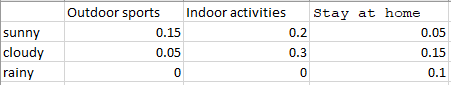

I capture the structure in this way:Make sure that all probabilities add up to 1. Then give the probability randomly. But make sure to stay at home on rainy and cloudy days, just like reality.

Next, we can illustrate the conditional probability. For example, the probability of being sunny given that the person is playing outdoor sports is:

P(X = Sunny | Y = Outdoor sports) = P(X = Sunny, Y = Outdoor sports) / P(Y = Outdoor sports)
                                   = 0.15 / (0.15 + 0.05 + 0.00)
                                   = 0.30
                                   
Finally, we can illustrate the marginal probability. For example, the probability of being sunny can be calculated by summing the joint probabilities over all possible values of Y:
P(X = Sunny) = P(X = Sunny, Y = Outdoor sports) + P(X = Sunny, Y = Indoor activities) + P(X = Sunny, Y = Stay at home)
             = 0.15 + 0.20 + 0.05
             = 0.40

In conclusion, the joint probability distribution provides a complete picture of the probabilistic relationship between X and Y, while the conditional probability gives information about the probability of X given Y and the marginal probability gives the overall probability of X.

### Exploration (40 pts)

In these problems, you are meant to do creative exploration.  Define and explore:

E.1 A discrete inference problem (20 pts)

E.2 A continuous inference problem (20 pts)

This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project.  The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background. For additional guidance, see the grading rubric below.

You can use the readings and other sources for inspiration, but here are a few ideas:
- An inference problem using categorical data
- A disease for which there are two different tests
- A two-dimensional continuous inference problem
- The idea of a conjugate prior


## Exploration （This was discussed with Yuqiao Xu 3619710, nan ke 3603163, zhaoxuan Jin 3594679, and ziming cui.）

E.1 A discrete inference problem

Consider a scenario where a marketing research company wants to determine the brand preference of a certain product among customers. A survey is conducted among a sample of n customers, where each customer is asked to indicate their preferred brand among two options, A and B. The goal is to infer the probability of choosing brand A, p, among the entire population based on the survey results.

Let x be the number of customers who prefer brand A in the sample, the likelihood function can be modeled as a binomial distribution:

$$p(x|p) = \binom{n}{x}p^x(1-p)^{n-x}$$

For the prior distribution of p, we can assume a Beta distribution:

$$p \sim Beta(\alpha, \beta)$$

The posterior distribution of p given the survey results can be calculated using Bayes' theorem:

$$p(p|x) = \frac{p(x|p)p(p)}{p(x)}$$

Using the conjugate prior property of the Beta distribution, the posterior distribution is also a Beta distribution with updated parameters:

$$p(p|x) \sim Beta(\alpha + x, \beta + n - x)$$

E.2 A continuous inference problem

Consider a scenario where a car manufacturing company wants to determine the average fuel efficiency of a certain model of cars. A sample of n cars is tested for fuel efficiency and the results are recorded in miles per gallon (mpg). The goal is to infer the average fuel efficiency, $\mu$, of the entire population based on the sample results.

Let $y_i$ be the fuel efficiency of the i-th car in the sample, the likelihood function can be modeled as a normal distribution:

$$p(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{(y_i-\mu)^2}{2\sigma^2}\right)$$

For the prior distribution of $\mu$, we can assume a normal distribution with mean $\mu_0$ and standard deviation $\sigma_0$:

$$\mu \sim N(\mu_0, \sigma_0^2)$$

The posterior distribution of $\mu$ given the sample results can be calculated using Bayes' theorem:

$$p(\mu|y) = \frac{p(y|\mu)p(\mu)}{p(y)}$$

Using the conjugate prior property of the normal distribution, the posterior distribution is also a normal distribution with updated parameters:

$$\mu|y \sim N\left(\frac{\sigma_0^2\sum_{i=1}^{n}y_i + \sigma^2\mu_0}{\sigma_0^2 + n\sigma^2}, \frac{\sigma_0^2\sigma^2}{\sigma_0^2 + n\sigma^2}\right)$$

#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|     | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. | 
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|